## TELECOM CHURN PREDICTION

Importing Utility Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Loading Dataset

In [2]:
data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

## Data Analysis


Printing Data Inside Dataset (Top 10 Rows)

In [3]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


To View and Analyze the Dataset (size of the dataset)

In [4]:
data.shape

(7043, 21)

There are 7043 cutomers and 21 features in the dataset.

In [5]:
for i in data.columns[6:-3]:
  print(f'Number of Categories in Variable {i} are: {len(data[i].unique())}')

Number of Categories in Variable PhoneService are: 2
Number of Categories in Variable MultipleLines are: 3
Number of Categories in Variable InternetService are: 3
Number of Categories in Variable OnlineSecurity are: 3
Number of Categories in Variable OnlineBackup are: 3
Number of Categories in Variable DeviceProtection are: 3
Number of Categories in Variable TechSupport are: 3
Number of Categories in Variable StreamingTV are: 3
Number of Categories in Variable StreamingMovies are: 3
Number of Categories in Variable Contract are: 3
Number of Categories in Variable PaperlessBilling are: 2
Number of Categories in Variable PaymentMethod are: 4


Here we can see that which variable have how many unique categories inside them

To Find Missing Values in The Dataset

In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

To Check If Any Duplicate Values Are Present

In [7]:
data.duplicated().sum()

0

Names Of Column Attributes

In [8]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

Data Types Of the Attributes

In [9]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The Statistical Summary For Each Numerical Column In The DataFrame.

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


Based on descriptive analysis on numerical columns,

1. the average tenure is 32 months,

2. average monthly charges is apprx 65$ respectively.

Analysis of **Churn Attribute**

In [12]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Here we can see that as per our dataset,

number of customers churned == 1869

number of customers not churned == 5174


In [13]:
subset_data = data[data["gender"] == "Male"][["InternetService", "Churn"]]

# Count occurrences based on the combination of "InternetService" and "Churn"
count_data = subset_data.groupby(["InternetService", "Churn"]).size().reset_index(name='Count')

print(count_data)


  InternetService Churn  Count
0             DSL    No    993
1             DSL   Yes    240
2     Fiber optic    No    910
3     Fiber optic   Yes    633
4              No    No    722
5              No   Yes     57


In [14]:
subset_data = data[data["gender"] == "Female"][["InternetService", "Churn"]]

# Count occurrences based on the combination of "InternetService" and "Churn"
count_data = subset_data.groupby(["InternetService", "Churn"]).size().reset_index(name='Count')

print(count_data)

  InternetService Churn  Count
0             DSL    No    969
1             DSL   Yes    219
2     Fiber optic    No    889
3     Fiber optic   Yes    664
4              No    No    691
5              No   Yes     56


Importing missingno Library to Visualize Missing Numbers/Values

In [15]:
import missingno as msno

Visualize missing values as a matrix

<Axes: >

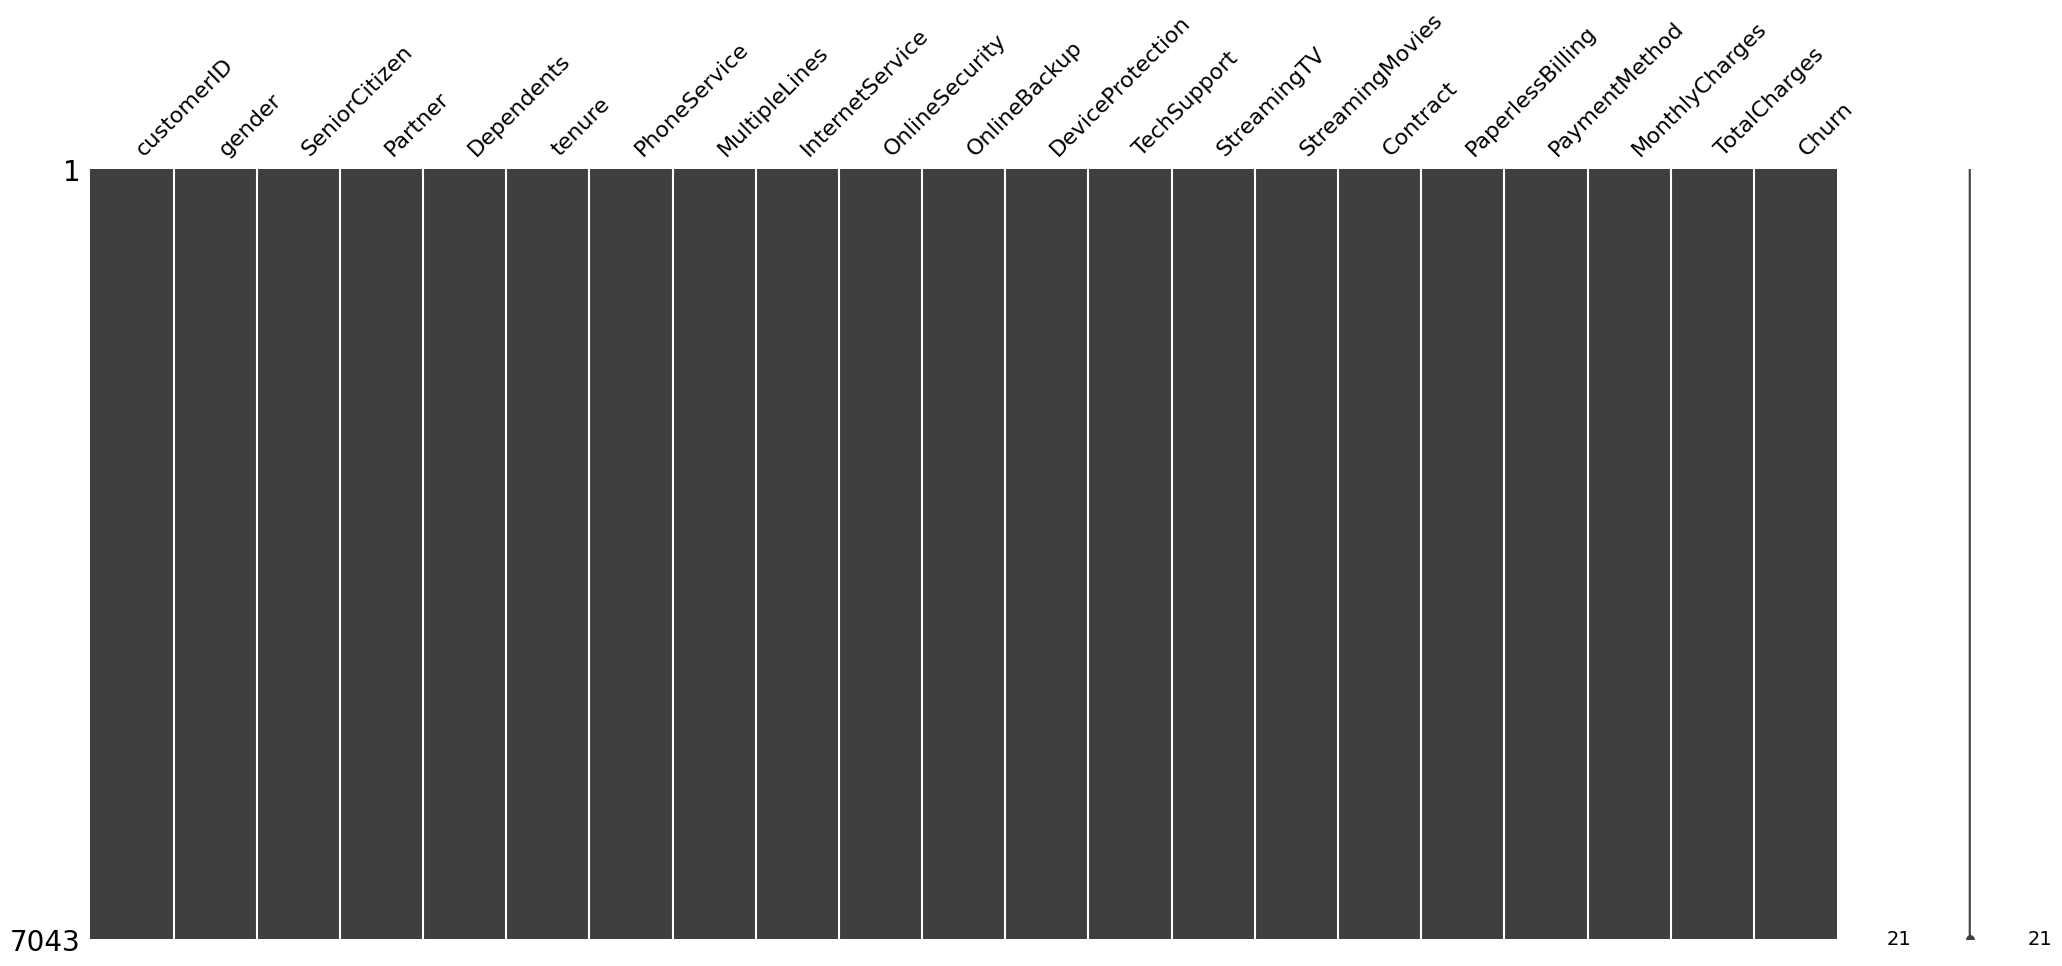

In [16]:
msno.matrix(data)

Using this matrix we can find the pattern of missingness in the dataset.

In above visualisation we can observe that it has no pattern . In fact there is no missing data.

On deep analysis, we can find that the Attribute no-19 i.e TotalCharges Attribute has Datatype as **Object** , But in Dataset The values are in **Numeric** form.

So here we will convert that attribute's datatype to numeric.

In [17]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

After converting the attribute in Numeric form we are able to find that we have 11 missing values in TotalCharges.

Let's check this data.

In [18]:
data[np.isnan(data['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.
We've checked if there are any other 0 values in the tenure column.

In [19]:
data[data['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

we can see that there are no additional missing values in the Tenure column.

Here we've deleted the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.



In [20]:
data.drop(data[data['tenure'] == 0].index, inplace=True)

Now we can check the size of the dataset after deleting the rows.

In [21]:
data.shape

(7032, 21)

To solve the problem of missing values in TotalCharges column, we decided to fill it with the **Mean** of TotalCharges values.

In [22]:
new_data=data.fillna(data["TotalCharges"].mean())

In [23]:
new_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Hence, here we can see that the null values have been replaced by Mean Value .

## DATA VISUALIZATION

For the Purpose of Data Visualization we will be using following Libraries⬇
1. Matplotlib
2. Seaborn

For using them we need to import their Libraries

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

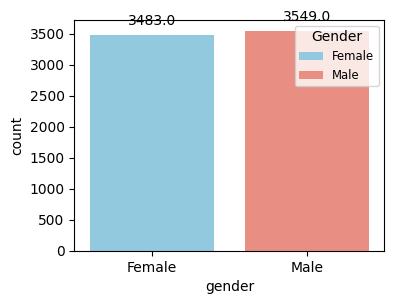

In [25]:
colors = ["skyblue", "salmon"]
with sns.color_palette(colors):
    plt.figure(figsize=(4,3))
    ax=sns.countplot(x="gender", data=new_data , hue="gender")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2.,
                                      p.get_height()), ha='center', va='center',
                xytext=(0, 10), textcoords='offset points')
ax.legend(title="Gender", labels=data["gender"].unique(), loc="upper right",fontsize='small')
plt.show()

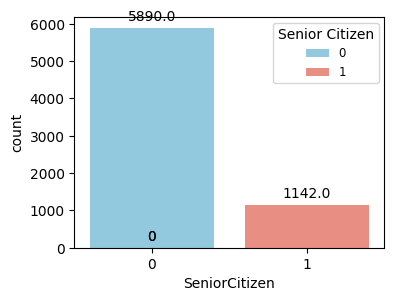

In [26]:
colors = ["skyblue", "salmon"]
with sns.color_palette(colors):
    plt.figure(figsize=(4,3))
    ax=sns.countplot(x="SeniorCitizen", data=new_data , hue="SeniorCitizen")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width()/2,
                                     p.get_height()),ha='center',va='center',
                xytext=(0, 8),textcoords='offset points')
ax.legend(title="Senior Citizen", labels=data["SeniorCitizen"].unique(), loc="upper right",fontsize='small')
plt.show()

Here in Senior Citizen ,

0 == Is not Senior Citizen

1 == Is Senior Citizen

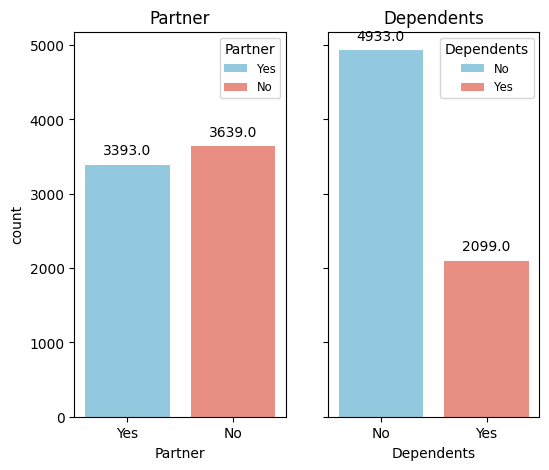

In [27]:
colors = ["skyblue", "salmon"]
with sns.color_palette(colors):
    fig, axes = plt.subplots(1,2, figsize=(6, 5), sharey=True)
    # Plot for Partner
    partner=sns.countplot(x="Partner", data=new_data, ax=axes[0],hue="Partner")
    axes[0].set_title('Partner')
    axes[0].legend(title="Partner", labels=new_data["Partner"].unique(), loc="upper right",fontsize='small')
    for p in partner.patches:
        partner.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                               ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Plot for Dependents
    dependent=sns.countplot(x="Dependents", data=new_data, ax=axes[1],hue="Dependents")
    axes[1].set_title('Dependents')
    axes[1].legend(title="Dependents", labels=new_data["Dependents"].unique(), loc="upper right",fontsize='small')
    for p in dependent.patches:
        dependent.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


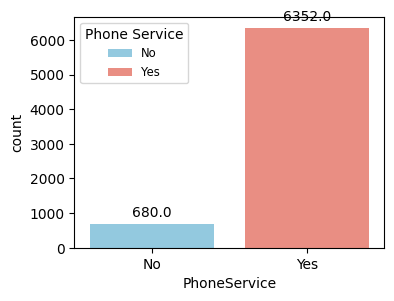

In [28]:
colors = ["skyblue", "salmon"]
with sns.color_palette(colors):
    plt.figure(figsize=(4,3))
    ax=sns.countplot(x="PhoneService", data=new_data , hue="PhoneService")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width()/2,
                                     p.get_height()),ha='center',va='center',
                xytext=(0, 8),textcoords='offset points')
ax.legend(title="Phone Service", labels=new_data["PhoneService"].unique(), loc="upper left",fontsize='small')
plt.show()

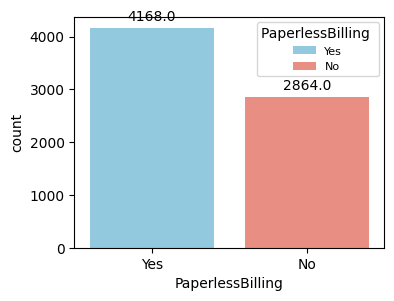

In [29]:
colors = ["skyblue", "salmon"]
with sns.color_palette(colors):
    plt.figure(figsize=(4,3))
    ax=sns.countplot(x="PaperlessBilling", data=new_data , hue="PaperlessBilling")


for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width()/2,
                                     p.get_height()),ha='center',va='center',
                xytext=(0, 8),textcoords='offset points')
ax.legend(title="PaperlessBilling ", labels=new_data["PaperlessBilling"].unique(), loc="upper right",fontsize=8)
plt.show()

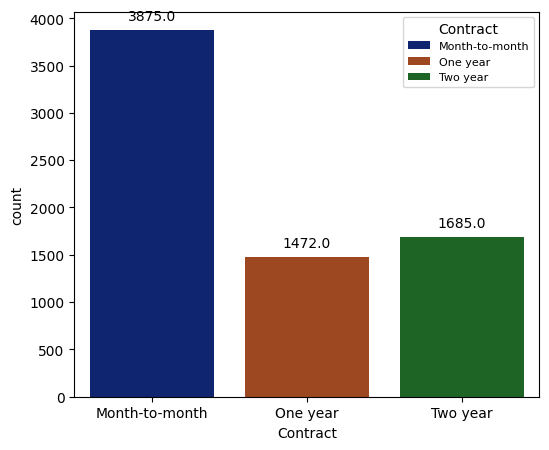

In [30]:

with sns.color_palette("dark"):
    plt.figure(figsize=(6, 5))
    ax=sns.countplot(x="Contract", data=new_data,hue="Contract")
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    ax.legend(title="Contract", labels=new_data["Contract"].unique(), loc="upper right",fontsize=8)
plt.show()

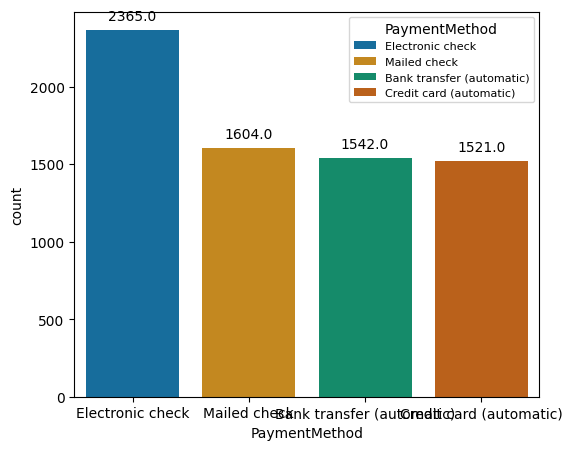

In [31]:

with sns.color_palette("colorblind"):
    plt.figure(figsize=(6, 5))
    ax=sns.countplot(x="PaymentMethod", data=new_data,hue="PaymentMethod")
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    ax.legend(title="PaymentMethod", labels=new_data["PaymentMethod"].unique(), loc="upper right",fontsize=8)
plt.show()

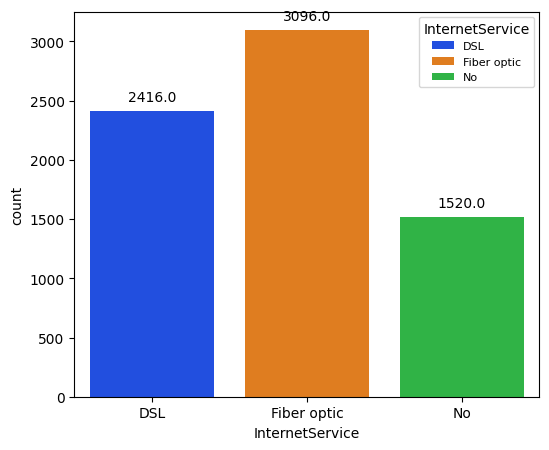

In [32]:
with sns.color_palette("bright"):
    plt.figure(figsize=(6, 5))
    ax=sns.countplot(x="InternetService", data=new_data,hue="InternetService")
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    ax.legend(title="InternetService", labels=new_data["InternetService"].unique(), loc="upper right",fontsize=8)
plt.show()

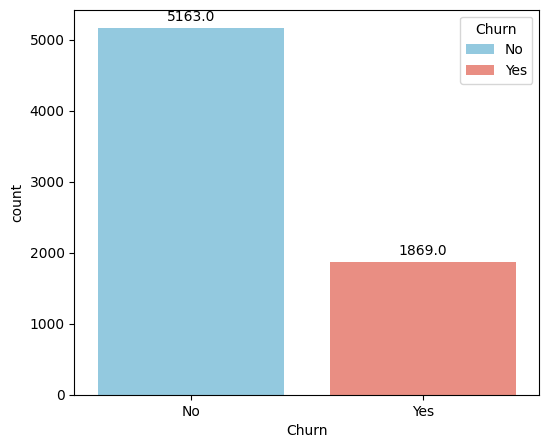

In [33]:
colors = ["skyblue", "salmon"]
with sns.color_palette(colors):
    plt.figure(figsize=(6,5))
    ax=sns.countplot(x="Churn",data=new_data ,hue="Churn")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width()/2,
                                     p.get_height()),ha='center',va='center',
                xytext=(0, 8),textcoords='offset points')
ax.legend(title="Churn", labels=new_data["Churn"].unique(), loc="upper right",fontsize='medium')
plt.show()

###Correlation Matrix


<Axes: title={'center': 'Correlation Matrix'}>

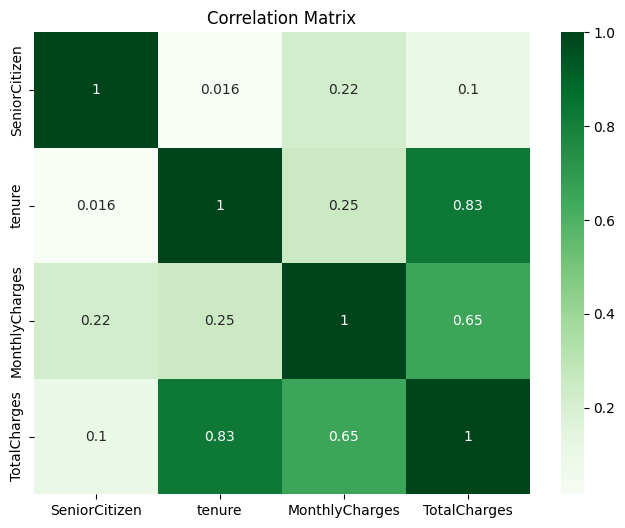

In [34]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])  # Selecting only numeric columns
matrix = numeric_data.corr()
plt.figure(figsize=(8, 6))
plt.title("Correlation Matrix")
sns.heatmap(matrix,cmap='Greens',annot=True)


Here we can see that there's high correlation in Monthly Charges and Tenure w.r.t Total Charges

As the column Customer-id was not of that importance so we will be dropping the column

In [35]:
new_data1=new_data.drop(columns=['customerID'])
new_data1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# **Feature Scaling**

Importing Label Encoder

In [36]:
from sklearn.preprocessing import LabelEncoder

Here we will be encoding the categorical data of object data type to numeric as 0, 1, 2.

In [37]:
def object_to_int(new_data1):
    if new_data1.dtype=='object':
        new_data1 = LabelEncoder().fit_transform(new_data1)
    return new_data1

In [38]:
df = new_data1.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Train - Test Splitting of Dataset

importing train_test_split from sklearn for splitting the dataset into training and testing dataset

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = df.drop(columns = ['Churn'])
y = df['Churn']

##Handling Imbalanced Dataset (SMOTE)

We have three methods to handling imbalanced data:

1) Over sampling

2) Under sampling

3) SMOTE(Synthetic Minority Over-sampling Technique)

### We have selected SMOTE .


## Before handling the distribution of classes:**

In [41]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
smote = SMOTE(random_state=0)
X_resample, y_resample = smote.fit_resample(X,y)

## After resampling:

In [44]:
y_resample.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size = 0.30, random_state = 42)

In [46]:
X_train.shape

(7228, 19)

In [47]:
y_train.shape

(7228,)

importing Standard Scaler for standardizing the dataset

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

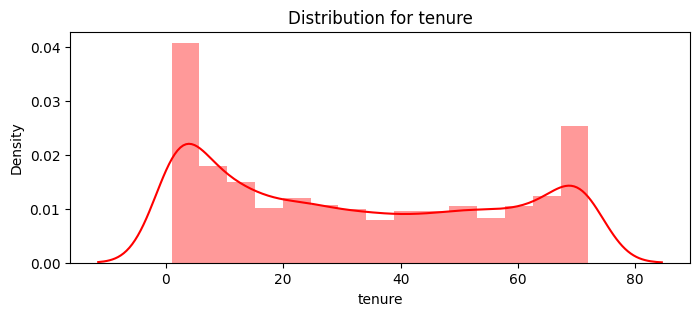

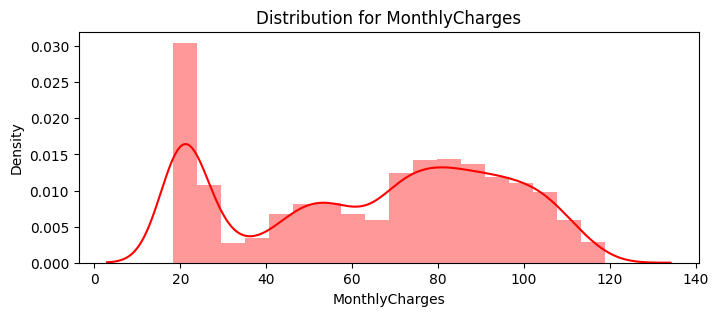

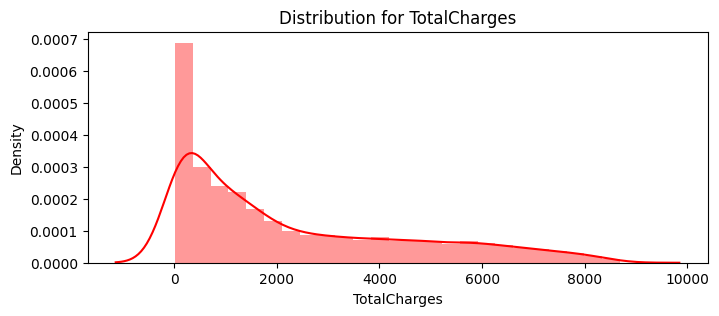

In [50]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

Since the numerical features are distributed over different value ranges, we will use standard scalar to scale them down to the same range.

Skewness for tenure (Square Root Transformation): -0.23414753011103323
Skewness for MonthlyCharges (Square Root Transformation): -0.48617903227398956
Skewness for TotalCharges (Square Root Transformation): 0.3088602407791124


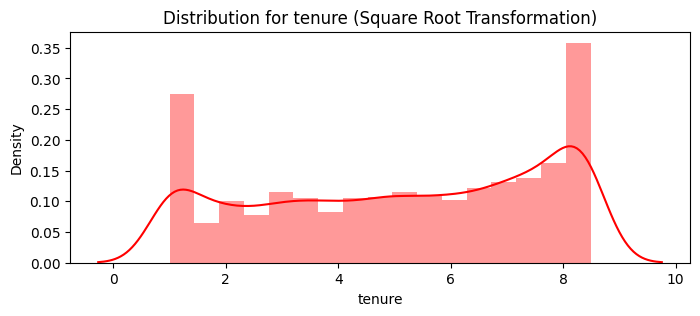

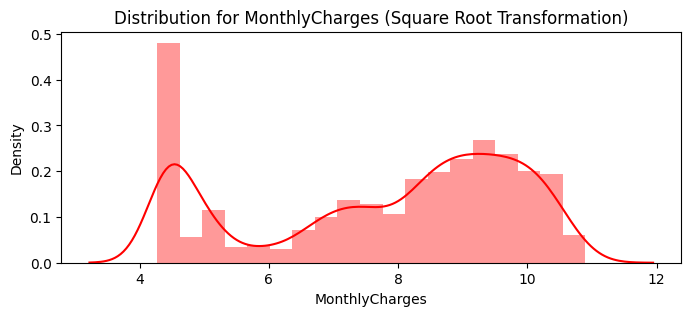

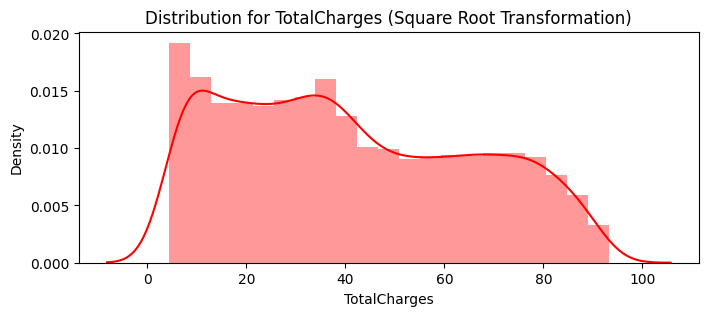

In [51]:
from scipy.stats import skew
def distplot(feature, frame, color='r'):
    # Square root transformation
    sqrt_feature = np.sqrt(frame[feature])
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {} (Square Root Transformation)".format(feature))
    ax = sns.distplot(sqrt_feature, color=color)
    # Calculate skewness after square root transformation
    skewness_sqrt = skew(sqrt_feature)
    print("Skewness for {} (Square Root Transformation): {}".format(feature, skewness_sqrt))

num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols:
    distplot(feat, df)

Standardizing numeric attributes

In [52]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Machine Learning Model Evaluations and Predictions

## Logistic Regression



In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import recall_score,confusion_matrix,precision_score,f1_score,accuracy_score,classification_report
from sklearn.metrics import confusion_matrix

In [54]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_pred= lr_model.predict(X_test)
accuracy_lr = lr_model.score(X_test,y_test)

print(classification_report(y_test, lr_pred))
print("--------------------------------------------------")
print("Logistic Regression accuracy is :",accuracy_lr)
print("--------------------------------------------------")
print('Confusion matrix for Logistic Regression :','\n',confusion_matrix(y_test,lr_pred))


              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1563
           1       0.77      0.84      0.81      1535

    accuracy                           0.80      3098
   macro avg       0.80      0.80      0.80      3098
weighted avg       0.80      0.80      0.80      3098

--------------------------------------------------
Logistic Regression accuracy is : 0.7998708844415752
--------------------------------------------------
Confusion matrix for Logistic Regression : 
 [[1183  380]
 [ 240 1295]]


## Decision Tree Classifier



In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)

print(classification_report(y_test, predictdt_y))
print("--------------------------------------------------")
print("Decision Tree accuracy is :",accuracy_dt)
print("--------------------------------------------------")
print('Confusion matrix for Decision Tree :','\n',confusion_matrix(y_test,predictdt_y))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1563
           1       0.79      0.79      0.79      1535

    accuracy                           0.79      3098
   macro avg       0.79      0.79      0.79      3098
weighted avg       0.79      0.79      0.79      3098

--------------------------------------------------
Decision Tree accuracy is : 0.7872821174951582
--------------------------------------------------
Confusion matrix for Decision Tree : 
 [[1233  330]
 [ 329 1206]]


## Random Forest



In [57]:
from sklearn.ensemble import RandomForestClassifier


In [59]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=50, max_leaf_nodes=30)
rf_model.fit(X_train, y_train)
prediction_test = rf_model.predict(X_test)
rf_accuracy = metrics.accuracy_score(y_test, prediction_test)

print(classification_report(y_test, prediction_test))
print("--------------------------------------------------")
print("Random Forest accuracy is:", rf_accuracy)
print("--------------------------------------------------")
print('Confusion matrix for Random Forest:', '\n', confusion_matrix(y_test, prediction_test))


              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1563
           1       0.79      0.86      0.82      1535

    accuracy                           0.82      3098
   macro avg       0.82      0.82      0.82      3098
weighted avg       0.82      0.82      0.82      3098

--------------------------------------------------
Random Forest accuracy is: 0.8182698515171078
--------------------------------------------------
Confusion matrix for Random Forest: 
 [[1213  350]
 [ 213 1322]]


## Hyperparamter tuning using GridSearchCV for Random Forest

In [60]:
from sklearn.model_selection import GridSearchCV
# Defining the parameter grid
param_grid = {
    'n_estimators': [25,50,75,100],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'max_leaf_nodes': [None, 10, 20, 30]  # Maximum number of leaf nodes in the tree
}

# Instantiating the Random Forest model
rf_model = RandomForestClassifier(random_state=50)

# Instantiating GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Finding Best Parameter
best_params = grid_search.best_params_

# Using the best parameters to train the final model
best_rf_model = RandomForestClassifier(**best_params, random_state=50)
best_rf_model.fit(X_train, y_train)
best_prediction_test = best_rf_model.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, best_prediction_test)

print(classification_report(y_test, best_prediction_test))
print("--------------------------------------------------")
print("Random Forest accuracy with hyperparameter tuning is :", best_rf_accuracy)
print("--------------------------------------------------")
print('Confusion matrix for Random Forest with hyperparameter tuning :','\n',
      confusion_matrix(y_test, best_prediction_test))


              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1563
           1       0.84      0.85      0.84      1535

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098

--------------------------------------------------
Random Forest accuracy with hyperparameter tuning is : 0.842156229825694
--------------------------------------------------
Confusion matrix for Random Forest with hyperparameter tuning : 
 [[1310  253]
 [ 236 1299]]


## Support Vector Classification

In [61]:
from sklearn.svm import SVC

In [62]:
svm_model=SVC(kernel='linear',random_state = 42)
svm_model.fit(X_train,y_train)
predict_y = svm_model.predict(X_test)
accuracy_svm = svm_model.score(X_test,y_test)

print(classification_report(y_test, predict_y))
print("--------------------------------------------------")
print("SVM accuracy is :",accuracy_svm)
print("--------------------------------------------------")
print('Confusion matrix for SVM :','\n',confusion_matrix(y_test,predict_y))


              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1563
           1       0.77      0.84      0.80      1535

    accuracy                           0.80      3098
   macro avg       0.80      0.80      0.80      3098
weighted avg       0.80      0.80      0.80      3098

--------------------------------------------------
SVM accuracy is : 0.7976113621691414
--------------------------------------------------
Confusion matrix for SVM : 
 [[1177  386]
 [ 241 1294]]


## Hyperparamter tuning using GridSearchCV for SVC

In [63]:
from sklearn.model_selection import GridSearchCV,KFold

In [77]:
folds = KFold(n_splits =5, shuffle = True, random_state = 42)
#specifing range of parameters (C) as a list
params = {"C": [0.01,0.1,1,5,10]}

model = SVC()

# Instantiating GridSearchCV
model_cv = GridSearchCV(estimator = model, param_grid = params,
                         scoring= 'accuracy',
                         cv = folds,
                         verbose = 1,
                        return_train_score=True,
                        n_jobs = -1)
#fit the model - it will fit 5 folds across all values of C
model_cv.fit(X_train, y_train)

best_score = model_cv.best_score_
# Get the best estimator
best_model = model_cv.best_estimator_

# Make predictions on the test set
predictions = best_model.predict(X_test)

# Generate classification report
report = classification_report(y_test, predictions)

print(report)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1563
           1       0.81      0.84      0.83      1535

    accuracy                           0.82      3098
   macro avg       0.82      0.82      0.82      3098
weighted avg       0.82      0.82      0.82      3098



# XGBoost Classifier

In [65]:
from xgboost import XGBClassifier

In [66]:
xgb_model = XGBClassifier( max_depth=3,n_estimators=50,random_state=42)
xgb_model.fit(X_train, y_train)
pred_model_y= xgb_model.predict(X_test)
accuracy_xgb=metrics.accuracy_score(y_test, pred_model_y)

print(classification_report(y_test, pred_model_y))
print("--------------------------------------------------")
print("XGB accuracy is :",accuracy_xgb)
print("--------------------------------------------------")
print('Confusion matrix for XGB :','\n',confusion_matrix(y_test,pred_model_y))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1563
           1       0.82      0.85      0.83      1535

    accuracy                           0.83      3098
   macro avg       0.83      0.83      0.83      3098
weighted avg       0.83      0.83      0.83      3098

--------------------------------------------------
XGB accuracy is : 0.8302130406714009
--------------------------------------------------
Confusion matrix for XGB : 
 [[1268  295]
 [ 231 1304]]


# Hyperparamter tuning using GridSearchCV for XGB

In [67]:
# Defining the parameter grid
param_grid={
    'max_depth':[3,4,5],  # Maximum depth of a tree
    'n_estimators':[50,100,200],  # Number of trees to fit
    'learning_rate':[0.01,0.1,0.2]  # Step size shrinkage used in update to prevent overfitting
}

# Instantiate the XGBoost classifier
xgb_model =XGBClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search=GridSearchCV(estimator=xgb_model,param_grid=param_grid,cv=5,scoring='accuracy')

grid_search.fit(X_train,y_train)

# Best parameters found
best_params=grid_search.best_params_

# Use the best parameters to train the final model
best_xgb_model=XGBClassifier(**best_params,random_state=42)
best_xgb_model.fit(X_train,y_train)
best_pred_model_y=best_xgb_model.predict(X_test)
best_accuracy_xgb=accuracy_score(y_test,best_pred_model_y)

print(classification_report(y_test,best_pred_model_y))
print("--------------------------------------------------")
print("XGBoost accuracy with hyperparameter tuning is :", best_accuracy_xgb)
print("--------------------------------------------------")
print('Confusion matrix for XGBoost with hyperparameter tuning :','\n',confusion_matrix(y_test, best_pred_model_y))


              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1563
           1       0.83      0.85      0.84      1535

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098

--------------------------------------------------
XGBoost accuracy with hyperparameter tuning is : 0.8386055519690123
--------------------------------------------------
Confusion matrix for XGBoost with hyperparameter tuning : 
 [[1290  273]
 [ 227 1308]]


# Artificial Neural Network

In [68]:
import tensorflow as tf
from tensorflow import keras

In [69]:
model = keras.Sequential([
    # input layer
    keras.layers.Dense(19, input_shape=(19,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10,activation = 'relu'),
    # we use sigmoid for binary output
    # output layer
    keras.layers.Dense(1, activation='sigmoid')
]
)


In [70]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
# now we fit our model to training data
model.fit(X_train,y_train,epochs=50)


Epoch 1/50


226/226 [==============================] - 1s 2ms/step - loss: 0.5171 - accuracy: 0.7572
Epoch 2/50
226/226 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.7911
Epoch 3/50
226/226 [==============================] - 0s 2ms/step - loss: 0.4295 - accuracy: 0.7934
Epoch 4/50
226/226 [==============================] - 0s 1ms/step - loss: 0.4228 - accuracy: 0.7981
Epoch 5/50
226/226 [==============================] - 0s 2ms/step - loss: 0.4195 - accuracy: 0.7988
Epoch 6/50
226/226 [==============================] - 0s 2ms/step - loss: 0.4158 - accuracy: 0.8019
Epoch 7/50
226/226 [==============================] - 0s 1ms/step - loss: 0.4114 - accuracy: 0.8062
Epoch 8/50
226/226 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8055
Epoch 9/50
226/226 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.8076
Epoch 10/50
226/226 [==============================] - 0s 2ms/step - loss: 0.4051 - accuracy: 0.8

In [71]:
ann_evaluation = model.evaluate(X_test, y_test)
ann_accuracy = ann_evaluation[1]

97/97 [==============================] - 0s 1ms/step - loss: 0.4273 - accuracy: 0.8131


In [72]:
# predict the churn values
ypred = model.predict(X_test)
print(ypred)
# unscaling the ypred values
ypred_lis = []
for i in ypred:
    if i>0.5:
        ypred_lis.append(1)
    else:
        ypred_lis.append(0)
print(ypred_lis)

97/97 [==============================] - 0s 1ms/step
[[0.3875203 ]
 [0.01081173]
 [0.03861114]
 ...
 [0.06765844]
 [0.63205516]
 [0.00123809]]
[0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0

In [73]:
print(classification_report(y_test,ypred_lis))
print("--------------------------------------------------")
print("ANN accuracy is :",ypred_lis)
print("--------------------------------------------------")
print('Confusion matrix for ANN :','\n',confusion_matrix(y_test,ypred_lis))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1563
           1       0.79      0.84      0.82      1535

    accuracy                           0.81      3098
   macro avg       0.81      0.81      0.81      3098
weighted avg       0.81      0.81      0.81      3098

--------------------------------------------------
ANN accuracy is : [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 

In [74]:
models_accuracy = {
    'Logistic Regression':round(accuracy_lr, 2),
    'Decision Tree' : round(accuracy_dt,2),
    'Random Forest': round(rf_accuracy,2),
    'SVM':  round(accuracy_svm,2),
    'XGBoost':  round(accuracy_xgb,2),
    'ANN' : ann_accuracy
}

df = pd.DataFrame(list(models_accuracy.items()), columns=['Model', 'Accuracy'])
sorted_values=df.sort_values(by='Accuracy',ascending=False)
sorted_values

,Model,Accuracy
4,XGBoost,0.830000
2,Random Forest,0.820000
5,ANN,0.813105
0,Logistic Regression,0.800000
3,SVM,0.800000
1,Decision Tree,0.790000


# Model Accuracy Of Top 2 Models After Tuning The Hyperparameter

In [75]:
models_accuracy = {
    'XGBoost':  round(best_accuracy_xgb,2),
    'Random Forest': round(best_rf_accuracy,2)
}

df = pd.DataFrame(list(models_accuracy.items()), columns=['Model', 'Tuned_Accuracy'])
sorted_values=df.sort_values(by='Tuned_Accuracy',ascending=False)
sorted_values

,Model,Tuned_Accuracy
0,XGBoost,0.84
1,Random Forest,0.84
